In [ ]:
#https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

In [1]:
#Check working directory
%pwd

'C:\\Users\\SJ\\Desktop\\NLP\\Sentiment labeled datasets'

In [6]:
#change work directory where file  downloaded
import os
os.chdir(r'C:\Users\SJ\Desktop\NLP\Sarcasm detetction')

In [7]:
%pwd

'C:\\Users\\SJ\\Desktop\\NLP\\Sarcasm detetction'

In [10]:
#Unzip the zipped file
import zipfile 

with zipfile.ZipFile('News Headlines Dataset For Sarcasm Detection.zip','r') as file:
    #print files
    file.printdir()
    
    #extract files
    file.extractall()
    

File Name                                             Modified             Size
Sarcasm_Headlines_Dataset.json                 2019-10-01 11:35:02      5616830
Sarcasm_Headlines_Dataset_v2.json              2019-10-01 11:35:04      6057046


In [32]:
#libraries 
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [12]:
#load json files
data1=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
data2=pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [13]:
#print 
data1.head(2)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0


In [14]:
data2.head(2)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...


In [15]:
#Combine both datasets
data=pd.concat([data1,data2])
data.head(5)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [16]:
data['article_link'][0].values

array(['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
       'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'],
      dtype=object)

In [17]:
data['headline'][0].values

array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       'thirtysomething scientists unveil doomsday clock of hair loss'],
      dtype=object)

### Text Cleaning

In [35]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [41]:
def clean_text(df):
    all_reviews = list()
    lines = df["headline"].values.tolist()
    for text in lines:
        text = text.lower()
        #We can combine a regular expression pattern into pattern objects, which can be used for pattern matching. 
        #It also helps to search a pattern again without rewriting it.
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        PS = PorterStemmer()
        words = [w for w in words if not w in stop_words]
        words = [PS.stem(w) for w in words if not w in stop_words]
        #words = ' '.join(words)
        all_reviews.append(words)
    return all_reviews

head_lines = clean_text(data)
head_lines[0:10]
    

[['former',
  'versac',
  'store',
  'clerk',
  'sue',
  'secret',
  'black',
  'code',
  'minor',
  'shopper'],
 ['roseann', 'reviv', 'catch', 'thorni', 'polit', 'mood', 'better', 'wors'],
 ['mom',
  'start',
  'fear',
  'son',
  'web',
  'seri',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'want',
  'wife',
  'listen',
  'not',
  'come',
  'altern',
  'debtreduct',
  'idea'],
 ['jk', 'rowl', 'wish', 'snape', 'happi', 'birthday', 'magic', 'way'],
 ['advanc', 'world', 'women'],
 ['fascin', 'case', 'eat', 'labgrown', 'meat'],
 ['ceo', 'send', 'kid', 'school', 'work', 'compani'],
 ['top', 'snake', 'handler', 'leav', 'sink', 'huckabe', 'campaign'],
 ['friday', 'morn', 'email', 'insid', 'trump', 'presser', 'age']]

### Visualization the most occuring word

(-0.5, 999.5, 499.5, -0.5)

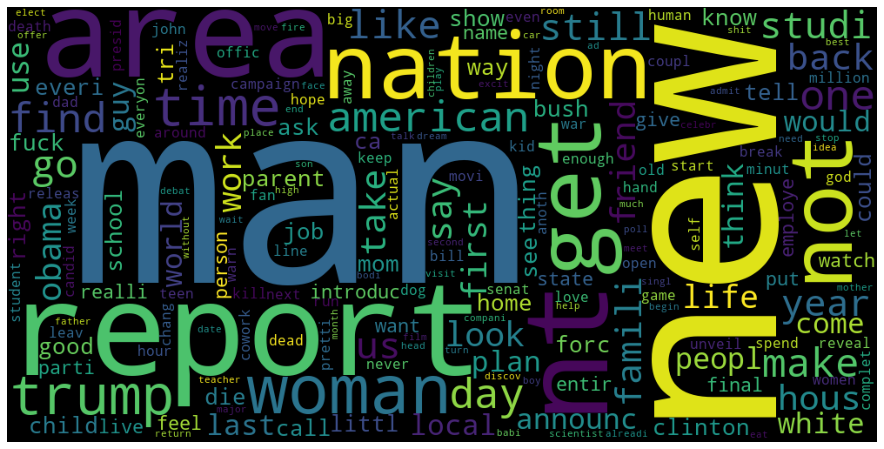

In [40]:
from collections import Counter
from wordcloud import WordCloud,ImageColorGenerator

pos_data=data.loc[data['is_sarcastic']==1]
pos_head_lines=clean_text(pos_data)
pos_lines=[j for sub in pos_head_lines for j in sub]
word_could_dict=Counter(pos_lines)

wordcloud= WordCloud(width=1000,height=500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')

### Split the data into train and test

In [45]:
validation_split = 0.2
max_length = 25

tokenizer=Tokenizer()
tokenizer.fit_on_texts(head_lines)
sequences=tokenizer.texts_to_sequences(head_lines)

word_index=tokenizer.word_index
vocab_size=len(word_index)+1
print('Unique tokens:',len(word_index))
print('Vcocab size:',vocab_size)

lines_pad=pad_sequences(sequences ,maxlen=max_length,padding='post')
sentiment=data['is_sarcastic'].values

indices=np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad=lines_pad[indices]
sentiment=sentiment[indices]

num_validation_samples=int(validation_split*lines_pad.shape[0])


X_train = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

Unique tokens: 19579
Vcocab size: 19580


In [47]:
#Check shape
print('Shape of X_train_pad:', X_train.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (44263, 25)
Shape of y_train: (44263,)
Shape of X_test_pad: (11065, 25)
Shape of y_test: (11065,)


### Load pretrained model(Glove)

In [ ]:
#Download pretrained model from here -https://nlp.stanford.edu/projects/glove/

In [51]:
filepath='C:/Users/SJ/Desktop/NLP/Hackathon'

import zipfile 

with zipfile.ZipFile(filepath + '/' + 'glove.6B.zip','r') as file:
    file.printdir()
    #extract 'glove.6B.300d.txt' file
    #path where to load the file
    file.extract('glove.6B.300d.txt',path='C:/Users/SJ/Desktop/NLP/Sarcasm detetction') 
    

File Name                                             Modified             Size
glove.6B.50d.txt                               2014-08-04 13:15:00    171350079
glove.6B.100d.txt                              2014-08-04 13:14:34    347116733
glove.6B.200d.txt                              2014-08-04 13:14:44    693432828
glove.6B.300d.txt                              2014-08-27 12:19:16   1037962819


In [64]:
embedding_index={}
embedding_dim=300
f=open(('glove.6B.300d.txt'),encoding='utf-8')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs
f.close()
print('Found %s word vectors.' %(len(embedding_index)))

Found 400000 word vectors.


### Build embedding layer

In [68]:
embedding_matrix=np.zeros((len(word_index)+1,embedding_dim))  #dimension should be always like this--((2,2))
c=0
for word,i in word_index.items():
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i]=embedding_vector
print(c)        

12157


In [69]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [70]:
#define model
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           5874000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 5,967,505
Trainable params: 93,505
Non-trainable params: 5,874,000
_________________________________________________________________
None


In [71]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test), verbose=2)

Epoch 1/25
1384/1384 - 29s - loss: 0.5555 - acc: 0.7133 - val_loss: 0.4749 - val_acc: 0.7725
Epoch 2/25
1384/1384 - 25s - loss: 0.4588 - acc: 0.7825 - val_loss: 0.4205 - val_acc: 0.8069
Epoch 3/25
1384/1384 - 26s - loss: 0.3950 - acc: 0.8206 - val_loss: 0.3899 - val_acc: 0.8266
Epoch 4/25
1384/1384 - 24s - loss: 0.3513 - acc: 0.8462 - val_loss: 0.3552 - val_acc: 0.8429
Epoch 5/25
1384/1384 - 24s - loss: 0.3158 - acc: 0.8650 - val_loss: 0.3365 - val_acc: 0.8552
Epoch 6/25
1384/1384 - 23s - loss: 0.2895 - acc: 0.8778 - val_loss: 0.3198 - val_acc: 0.8619
Epoch 7/25
1384/1384 - 24s - loss: 0.2641 - acc: 0.8901 - val_loss: 0.3069 - val_acc: 0.8772
Epoch 8/25
1384/1384 - 26s - loss: 0.2428 - acc: 0.9012 - val_loss: 0.2815 - val_acc: 0.8881
Epoch 9/25
1384/1384 - 26s - loss: 0.2282 - acc: 0.9071 - val_loss: 0.2824 - val_acc: 0.8869
Epoch 10/25
1384/1384 - 25s - loss: 0.2150 - acc: 0.9138 - val_loss: 0.2624 - val_acc: 0.8983
Epoch 11/25
1384/1384 - 24s - loss: 0.2026 - acc: 0.9193 - val_loss: 

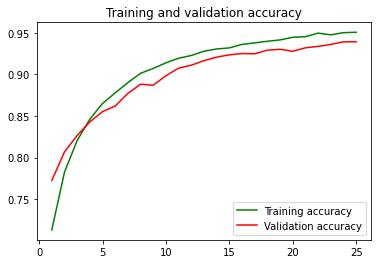

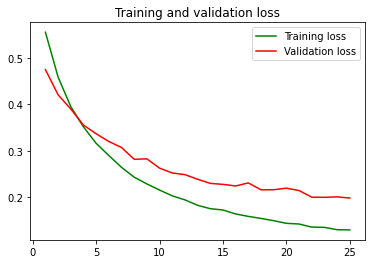

In [72]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()